In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ShubhamSBhat/BugsandByte.git

fatal: destination path 'BugsandByte' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
with pd.ExcelFile('/content/BugsandByte/Training Set (1).xlsx') as xls:
    sheet1 = pd.read_excel(xls, 'training_1')
    sheet2 = pd.read_excel(xls, 'training_2')
sheet1.rename(columns={'local_output': 'local_code'}, inplace=True)
master_df = pd.read_excel('/content/BugsandByte/master dataset.xlsx')
train_df = pd.concat([sheet1, sheet2], axis=0)

In [ ]:
train_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code
0,HONDA,CR-V,2.4 MT,2354.0,5.0,PETROL,12623.0
1,HONDA,CR-V,2.4 MT,2354.0,5.0,PETROL,12623.0
2,VOLKSWAGEN,AMEO,1.5L TDI MT COMFORTLINE PLUS,1498.0,5.0,DIESEL,36811.0
3,FORD,FIGO,1.2 TITANIUM SPORTS PETROL,1196.0,5.0,PETROL,36819.0
4,LAMBORGHINI,AVENTADOR,S LP 740-4,6498.0,2.0,PETROL,37548.0


In [ ]:
train_df.describe()

,cc,seating_capacity,local_code
count,9101.000000,9101.000000,9101.000000
mean,1817.304582,5.403802,25975.989781
std,911.803612,1.276716,10781.127891
min,13.000000,0.000000,109.000000
25%,1199.000000,5.000000,18698.000000
50%,1498.000000,5.000000,24388.000000
75%,1999.000000,5.000000,33313.000000
max,7993.000000,25.000000,46664.000000


In [ ]:
train_df.shape

(9101, 7)

In [ ]:
master_df.shape

(7678, 7)

In [ ]:
master_df.head()

,make,model,variant,fuel_type,cc,seating_capacity,output
0,ALFA ROMEO,156 GTA,STD,Petrol,3179.0,5.0,1.110110e+09
1,ALFA ROMEO,VINTAGE,ROMEO,Petrol,1100.0,5.0,1.110110e+09
2,ALFA ROMEO,VINTAGE,ALFA ROMEO,Petrol,1750.0,5.0,1.110110e+09
3,ALFA ROMEO,VINTAGE,ALFA ROMEO,Petrol,1570.0,5.0,1.110110e+09
4,ALFA ROMEO,VINTAGE,ALFA ROMEO,Petrol,1110.0,5.0,1.110110e+09


In [ ]:
master_df.describe()

,cc,seating_capacity,output
count,7678.000000,7678.000000,7.678000e+03
mean,1954.068768,5.357906,1.112837e+09
std,1079.025751,1.170970,1.859091e+06
min,1.000000,1.000000,1.110110e+09
25%,1199.000000,5.000000,1.111811e+09
50%,1520.000000,5.000000,1.112612e+09
75%,2184.000000,5.000000,1.113811e+09
max,8200.000000,14.000000,1.126100e+09


<h3>Data Preprocessing</h3>

In [ ]:
train_df.isnull().sum()

make                 0
model                0
variant             75
cc                   0
seating_capacity     0
fuel_type            0
local_code           0
dtype: int64

In [ ]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

make                0
model               0
variant             0
cc                  0
seating_capacity    0
fuel_type           0
local_code          0
dtype: int64

In [ ]:

master_df.head()

,make,model,variant,fuel_type,cc,seating_capacity,output
0,ALFA ROMEO,156 GTA,STD,Petrol,3179.0,5.0,1.110110e+09
1,ALFA ROMEO,VINTAGE,ROMEO,Petrol,1100.0,5.0,1.110110e+09
2,ALFA ROMEO,VINTAGE,ALFA ROMEO,Petrol,1750.0,5.0,1.110110e+09
3,ALFA ROMEO,VINTAGE,ALFA ROMEO,Petrol,1570.0,5.0,1.110110e+09
4,ALFA ROMEO,VINTAGE,ALFA ROMEO,Petrol,1110.0,5.0,1.110110e+09


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def preprocess(df):


  df = df.apply(lambda x: x.astype(str).str.lower())
  makes = df['make']
  special_characters = ['!','#','$','%', '&','@','[',']',' ',']','_','-']
  new_makes = []
  for make in makes:
    new_make = make
    for i in special_characters:
      new_make = new_make.replace(i,' ')
    tokens = word_tokenize(new_make)
    if 'mahindra' in make:
      new_makes.append(make)
    elif 'm & m' == make:
      new_makes.append('mahindra and mahindra')
    elif tokens[0] == 'volks':
      new_makes.append('volkswagen')
    elif tokens[0] in stopwords.words('english'):
      new_makes.append(tokens[1])
    else:
      new_makes.append(tokens[0])
  df['make'] = new_makes
  return df

In [ ]:
train_df = preprocess(train_df)

In [ ]:
train_df['Name']=train_df[train_df.columns[0:3]].apply(
      lambda x: " ".join(x),axis=1
  )

In [ ]:
len(train_df['make'].unique())

76

In [ ]:
train_df.describe()

,make,model,variant,cc,seating_capacity,fuel_type,local_code,Name
count,9026,9026,9026,9026,9026,9026,9026,9026
unique,76,902,8077,361,19,10,8591,8960
top,hyundai,scorpio,vxi,1197.0,5.0,petrol,28485.0,tata zest xt revotron 90ps petrol
freq,1122,106,21,411,6738,2851,12,12


In [ ]:
def fuel_change(x):
  new_x = None
  if 'petrol' in x:
    return 0
  elif 'diesel' in x:
    return 1
  elif 'electric' in x:
    return 3
  elif 'cng' in x:
    return 4
  else:
    return 5

In [ ]:
master_df = preprocess(master_df)

In [ ]:
master_df['fuel_type'] = master_df['fuel_type'].apply(fuel_change)
train_df['fuel_type'] = train_df['fuel_type'].apply(fuel_change)

In [ ]:
master_df['fuel_type'].unique()

array([0, 1, 3, 4, 5])

In [ ]:
master_df['fuel_type'].unique()

array([0, 1, 3, 4, 5])

<h1> Creating Clusters </h1>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 8)

In [ ]:
kmeans

KMeans()

In [ ]:
KModel = kmeans.fit(master_df[['fuel_type','cc','seating_capacity']])
KModel

KMeans()

In [ ]:
labels = list(KModel.labels_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


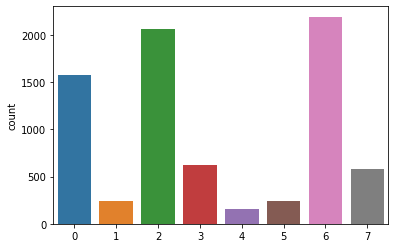

In [ ]:
sns.countplot(labels)

In [ ]:
cluster_centers = list(KModel.cluster_centers_)

In [ ]:
cluster_centers

[array([6.85877137e-01, 2.01073654e+03, 5.69601013e+00]),
 array([1.32780083e-01, 4.77433610e+03, 4.67634855e+00]),
 array([5.90513069e-01, 1.47765973e+03, 5.22797677e+00]),
 array([6.29213483e-01, 2.97895827e+03, 5.67576244e+00]),
 array([8.69565217e-02, 6.32158385e+03, 4.45962733e+00]),
 array([1.17647059e-01, 3.80613866e+03, 4.62184874e+00]),
 array([5.98723210e-01, 1.09428363e+03, 5.00227998e+00]),
 array([7.14038128e-01, 2.50543501e+03, 6.74523397e+00])]

In [ ]:
 train_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code,Name
0,honda,cr-v,2.4 mt,2354.0,5.0,0,12623.0,honda cr-v 2.4 mt
1,honda,cr-v,2.4 mt,2354.0,5.0,0,12623.0,honda cr-v 2.4 mt
2,volkswagen,ameo,1.5l tdi mt comfortline plus,1498.0,5.0,1,36811.0,volkswagen ameo 1.5l tdi mt comfortline plus
3,ford,figo,1.2 titanium sports petrol,1196.0,5.0,0,36819.0,ford figo 1.2 titanium sports petrol
4,lamborghini,aventador,s lp 740-4,6498.0,2.0,0,37548.0,lamborghini aventador s lp 740-4


In [ ]:
master_df['cluster_no'] = labels

In [ ]:
train_df['predictions'] = KModel.predict(train_df[['fuel_type','cc','seating_capacity']])

In [ ]:
import collections
names = collections.defaultdict(list)
for index,value in enumerate(labels):
  name = master_df.iloc[index,0] + ' '+ master_df.iloc[index,1] + ' ' + master_df.iloc[index,2]
  code = master_df.iloc[index,6]
  names[value].append([name,code])

In [ ]:
names.head()

NameError: ignored

In [ ]:
import difflib

In [ ]:
def predict(df):
  map_codes = []
  for index in range(df.shape[0]):
    point = df.iloc[index,]
    curr_name = point['Name']
    maxi_sim = 0
    map_code = None
    map_name = None
    for name in names[point['predictions']]:
      this_name = name[0]
      temp = difflib.SequenceMatcher(None,curr_name,this_name)
      # print(this_name,curr_name,temp.ratio())
      sim = temp.ratio()
      if sim > maxi_sim:
        maxi_sim = sim
        map_code = name[1]
        map_name = this_name
        maxi_sim = max(maxi_sim,sim)
    # print(map_code,maxi_sim,map_name,curr_name)
    map_codes.append(map_code)
  df['map_codes'] = map_codes
  return df

In [ ]:
test_df = pd.read_excel('/content/BugsandByte/Test Set -Final.xlsx')
test_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code
0,Mahindra & Mahindra,Bolero,DI 8Str,2523.0,8.0,Diesel,512.0
1,Jaguar,XF,R V8,5000.0,5.0,Petrol,459.0
2,Hyundai,Xcent,1.2 Prime T CRDI,1186.0,5.0,Diesel,5557.0
3,Maruti Suzuki,Celerio,ZXI AT Optional,998.0,5.0,Petrol,3324.0
4,Skoda,Kushaq,1.5 Style TSI MT,1498.0,5.0,Petrol,5748.0


In [ ]:
test_df = preprocess(test_df)

In [ ]:
test_df['Name']=test_df[test_df.columns[0:3]].apply(
    lambda x: " ".join(x),axis=1
)
test_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code,Name
0,mahindra & mahindra,bolero,di 8str,2523.0,8.0,diesel,512.0,mahindra & mahindra bolero di 8str
1,jaguar,xf,r v8,5000.0,5.0,petrol,459.0,jaguar xf r v8
2,hyundai,xcent,1.2 prime t crdi,1186.0,5.0,diesel,5557.0,hyundai xcent 1.2 prime t crdi
3,maruti,celerio,zxi at optional,998.0,5.0,petrol,3324.0,maruti celerio zxi at optional
4,skoda,kushaq,1.5 style tsi mt,1498.0,5.0,petrol,5748.0,skoda kushaq 1.5 style tsi mt


In [ ]:
test_df['fuel_type'] = test_df['fuel_type'].apply(fuel_change)

In [ ]:
test_df['predictions'] = KModel.predict(test_df[['fuel_type','cc','seating_capacity']])

In [ ]:
test_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code,Name,predictions
0,mahindra & mahindra,bolero,di 8str,2523.0,8.0,1,512.0,mahindra & mahindra bolero di 8str,7
1,jaguar,xf,r v8,5000.0,5.0,0,459.0,jaguar xf r v8,1
2,hyundai,xcent,1.2 prime t crdi,1186.0,5.0,1,5557.0,hyundai xcent 1.2 prime t crdi,6
3,maruti,celerio,zxi at optional,998.0,5.0,0,3324.0,maruti celerio zxi at optional,6
4,skoda,kushaq,1.5 style tsi mt,1498.0,5.0,0,5748.0,skoda kushaq 1.5 style tsi mt,2


In [ ]:
test_df = predict(test_df)

In [ ]:
test_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code,Name,predictions,map_codes
0,mahindra & mahindra,bolero,di 8str,2523.0,8.0,1,512.0,mahindra & mahindra bolero di 8str,7,1112310109.0
1,jaguar,xf,r v8,5000.0,5.0,0,459.0,jaguar xf r v8,1,1112010313.0
2,hyundai,xcent,1.2 prime t crdi,1186.0,5.0,1,5557.0,hyundai xcent 1.2 prime t crdi,6,1111812473.0
3,maruti,celerio,zxi at optional,998.0,5.0,0,3324.0,maruti celerio zxi at optional,6,1112611044.0
4,skoda,kushaq,1.5 style tsi mt,1498.0,5.0,0,5748.0,skoda kushaq 1.5 style tsi mt,2,1113611106.0


In [ ]:
copy = test_df['map_codes'].astype('float')

In [ ]:
new_copy = test_df['local_code'].astype('float')
new_copy = [int(x) for x in new_copy]
test_df['local_code'] = new_copy

In [ ]:
old_copy = test_df['map_codes']
test_df['map_codes'] = copy
test_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code,Name,predictions,map_codes
0,mahindra & mahindra,bolero,di 8str,2523.0,8.0,1,512,mahindra & mahindra bolero di 8str,7,1112310109
1,jaguar,xf,r v8,5000.0,5.0,0,459,jaguar xf r v8,1,1112010313
2,hyundai,xcent,1.2 prime t crdi,1186.0,5.0,1,5557,hyundai xcent 1.2 prime t crdi,6,1111812473
3,maruti,celerio,zxi at optional,998.0,5.0,0,3324,maruti celerio zxi at optional,6,1112611044
4,skoda,kushaq,1.5 style tsi mt,1498.0,5.0,0,5748,skoda kushaq 1.5 style tsi mt,2,1113611106


In [ ]:
test_df.head()

,make,model,variant,cc,seating_capacity,fuel_type,local_code,Name,predictions,map_codes
0,mahindra & mahindra,bolero,di 8str,2523.0,8.0,1,512,mahindra & mahindra bolero di 8str,7,1112310109
1,jaguar,xf,r v8,5000.0,5.0,0,459,jaguar xf r v8,1,1112010313
2,hyundai,xcent,1.2 prime t crdi,1186.0,5.0,1,5557,hyundai xcent 1.2 prime t crdi,6,1111812473
3,maruti,celerio,zxi at optional,998.0,5.0,0,3324,maruti celerio zxi at optional,6,1112611044
4,skoda,kushaq,1.5 style tsi mt,1498.0,5.0,0,5748,skoda kushaq 1.5 style tsi mt,2,1113611106


In [ ]:
subm = test_df[['local_code','map_codes']]
writer = pd.ExcelWriter('submission.xlsx')
subm.to_excel(writer)
writer.save()

In [ ]:
subm.to_csv('submission.csv',index=False)